In [130]:
import pandas as pd
import numpy as np
import os

from matplotlib import pyplot as plt
from scipy.signal import find_peaks
from sklearn.model_selection import train_test_split
from catboost import CatBoost
from catboost.utils import eval_metric

In [104]:
fileNames = list()
iter = 0
for file in os.listdir():
    if file.endswith(".csv"):
        fileNames.append(file)
    iter += 1
    if iter == 5:
        break

In [105]:
data = [pd.read_csv(file) for file in fileNames]

## Тестим на одном сигнале

In [106]:
dataOne = data[0]
columns = dataOne.columns
signal = dataOne[columns[1]]
signal = signal[0:50000]

(0.0, 17500.0)

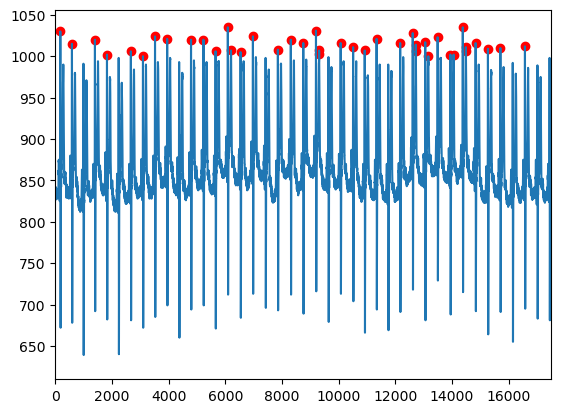

In [107]:
peaks = find_peaks(signal, height=1000)
plt.plot(signal)
plt.scatter(peaks[0], signal[peaks[0]], color='red')
plt.xlim([0, 17500])

In [125]:
window_size = 300
stride = 8
y_lim = 0.1
x_lim = 10

In [126]:
def parseSignal(signal, peaks):
    dataset = []
    middles = []
    peak_count = 0
    
    for i in range(0, len(signal) - window_size, stride):
        norm_coef = np.max(np.abs(signal[i:i+window_size]))
        piece = signal[i:i+window_size] / norm_coef
        piece = piece - np.mean(piece)
        is_peak = 0
        middle = int((i + i + window_size) / 2)
        for peak in peaks[0]:
            if peak >= middle - x_lim and peak < middle + x_lim and (signal[peak] - signal[middle]) / norm_coef < y_lim:
                is_peak = 1
                peak_count += 1
                middles.append(middle)
                break
        piece = np.append(piece, is_peak)
        dataset.append(piece)
        print(str(i) + " of " + str(len(signal) - window_size))
    
    return dataset, peak_count, middles

In [110]:
dataset, p_count, middles = parseSignal(signal, peaks)
df = pd.DataFrame(dataset)

(0.0, 2000.0)

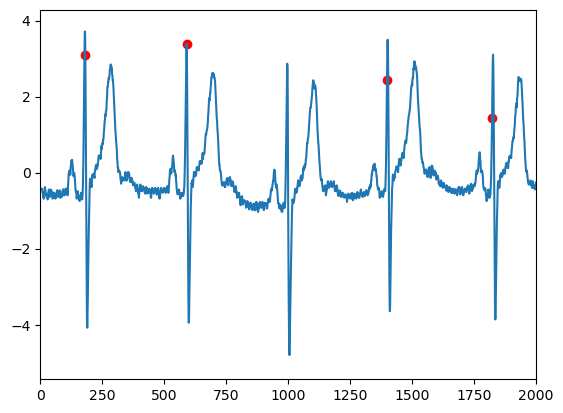

In [111]:
signalNorm = (signal - np.mean(signal)) / np.std(signal)
plt.plot(signalNorm)
plt.scatter(middles, signalNorm[middles], color='red')
plt.xlim([0, 2000])

## Для всех сигналов

In [113]:
signal = list()
for df in data:
    signal.extend(df[df.columns[1]])

peaks = find_peaks(signal, height=1100)

In [114]:
dataset, p_count, middles = parseSignal(signal, peaks)
df = pd.DataFrame(dataset)

0 of 1299700
8 of 1299700
16 of 1299700
24 of 1299700
32 of 1299700
40 of 1299700
48 of 1299700
56 of 1299700
64 of 1299700
72 of 1299700
80 of 1299700
88 of 1299700
96 of 1299700
104 of 1299700
112 of 1299700
120 of 1299700
128 of 1299700
136 of 1299700
144 of 1299700
152 of 1299700
160 of 1299700
168 of 1299700
176 of 1299700
184 of 1299700
192 of 1299700
200 of 1299700
208 of 1299700
216 of 1299700
224 of 1299700
232 of 1299700
240 of 1299700
248 of 1299700
256 of 1299700
264 of 1299700
272 of 1299700
280 of 1299700
288 of 1299700
296 of 1299700
304 of 1299700
312 of 1299700
320 of 1299700
328 of 1299700
336 of 1299700
344 of 1299700
352 of 1299700
360 of 1299700
368 of 1299700
376 of 1299700
384 of 1299700
392 of 1299700
400 of 1299700
408 of 1299700
416 of 1299700
424 of 1299700
432 of 1299700
440 of 1299700
448 of 1299700
456 of 1299700
464 of 1299700
472 of 1299700
480 of 1299700
488 of 1299700
496 of 1299700
504 of 1299700
512 of 1299700
520 of 1299700
528 of 1299700
536 of 129

(800.0, 1200.0)

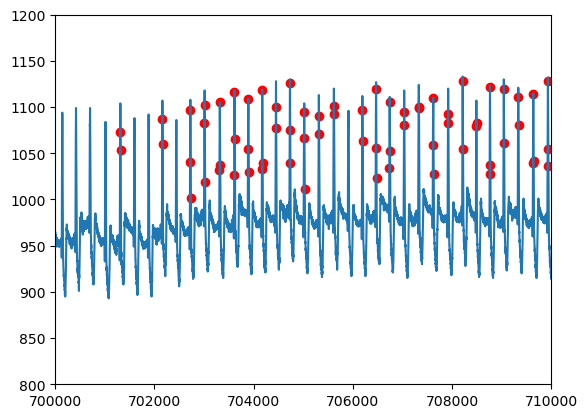

In [122]:
df_to_plot = pd.DataFrame(signal)
plt.plot(signal)
plt.scatter(middles[:p_count], df_to_plot[0][middles[:p_count]], color='red')
plt.xlim([700000, 710000])
plt.ylim([800, 1200])

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[: , :window_size], df[window_size], test_size = 0.15)

booster = CatBoost(params={'iterations':100, 'loss_function':'Logloss'})

booster.fit(X_train, Y_train, eval_set=(X_test, Y_test))
booster.set_feature_names([str(i) for i in range(window_size)])

test_preds = booster.predict(X_test, prediction_type="Class")
train_preds = booster.predict(X_train, prediction_type="Class")

Learning rate set to 0.291428
0:	learn: 0.1745156	test: 0.1724963	best: 0.1724963 (0)	total: 46.7ms	remaining: 4.62s
1:	learn: 0.0590962	test: 0.0576174	best: 0.0576174 (1)	total: 80.8ms	remaining: 3.96s
2:	learn: 0.0239040	test: 0.0225713	best: 0.0225713 (2)	total: 111ms	remaining: 3.6s
3:	learn: 0.0164337	test: 0.0153274	best: 0.0153274 (3)	total: 138ms	remaining: 3.32s
4:	learn: 0.0150786	test: 0.0140021	best: 0.0140021 (4)	total: 166ms	remaining: 3.15s
5:	learn: 0.0127640	test: 0.0119901	best: 0.0119901 (5)	total: 194ms	remaining: 3.04s
6:	learn: 0.0117761	test: 0.0112296	best: 0.0112296 (6)	total: 223ms	remaining: 2.96s
7:	learn: 0.0110720	test: 0.0106698	best: 0.0106698 (7)	total: 253ms	remaining: 2.9s
8:	learn: 0.0107180	test: 0.0103205	best: 0.0103205 (8)	total: 281ms	remaining: 2.84s
9:	learn: 0.0105070	test: 0.0102379	best: 0.0102379 (9)	total: 309ms	remaining: 2.78s
10:	learn: 0.0103211	test: 0.0101991	best: 0.0101991 (10)	total: 340ms	remaining: 2.75s
11:	learn: 0.0100863	t

In [133]:
testScore = eval_metric(Y_test.values, test_preds, "Accuracy")[0]
trainScore = eval_metric(Y_train.values, train_preds, "Accuracy")[0]

print(f"\nTest  Accuracy : {testScore}")
print(f"Train Accuracy : {trainScore}")
print(len(Y_test.values))


Test  Accuracy : 0.9970455478046779
Train Accuracy : 0.999333782306127
24370


## Тестим на других данных 

In [154]:
data_check = pd.read_csv("201.csv")
signal_check = data_check[columns[1]].values
signal_check = signal_check[0:50000]

In [155]:
dataset_check = []
middles_check = []
for i in range(0, len(signal_check)-window_size, stride):
    piece = signal_check[i:i+window_size] / np.max(np.abs(signal_check[i:i+window_size]))
    piece = piece - np.mean(piece)
    middle = (i + i + window_size) / 2
    middles_check.append(middle)
    dataset_check.append(piece)

In [156]:
df_check = pd.DataFrame(dataset_check)
test_preds = booster.predict(df_check, prediction_type="Class")

(0.0, 2500.0)

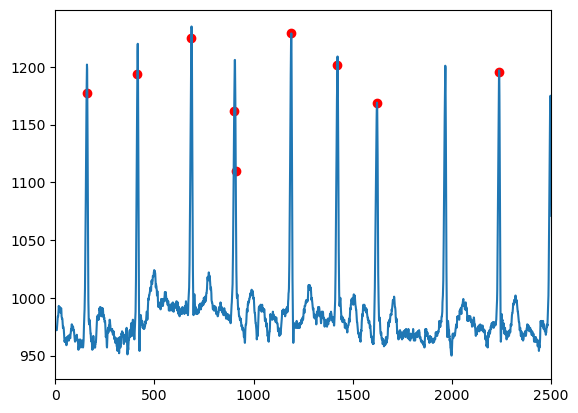

In [157]:
peaks_check = np.where(test_preds>0)[0]
middles_check = np.asarray(middles_check, dtype=int)
plt.plot(signal_check)
plt.scatter(middles_check[peaks_check], signal_check[middles_check[peaks_check]], color='red')
plt.xlim([0, 2500])